In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import pyreadstat as pr            #Leer archivos tipo .sav

from sklearn import linear_model   #Aplicar regresiones
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score #Ver la eficiencia del modelo
from sklearn.linear_model import LinearRegression #Modulo especíal de regresión lineal

from sklearn.tree import DecisionTreeClassifier #Importar el clasificador
from sklearn.model_selection import train_test_split #Importar funciones de partición 
from sklearn.tree import export_graphviz
from io import StringIO

from IPython.display import Image
import pydotplus


ModuleNotFoundError: No module named 'pyreadstat'

# Regresión lineal

In [5]:
df , meta = pr.read_sav('compensacion-ejecutivos.sav')
df.head()

,salario,noasiat,gpa,postgrad,experien
0,99026.0,0.0,3.36,0.0,15.0
1,69190.0,1.0,2.35,1.0,9.0
2,95453.0,1.0,3.33,1.0,10.0
3,57695.0,1.0,3.37,0.0,2.0
4,94364.0,1.0,3.87,1.0,4.0


In [21]:
Y = df.salario
X = df[['experien','gpa']]
Z = df.experien

Hago la regresión

In [19]:
reg_lin = sm.OLS(Y,sm.add_constant(X)).fit()

In [20]:
reg_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           7.37e-38
Time:                        00:37:12   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.253   -3606.328    1.35e+04
experien    1973.1918    148.539     13.284      0.000    1678.730    2267.653
gpa         2.024e+04   1364.423     14.831      0.000    1.75e+04    2.29e+04
==============================================================================
Omnibus:                        0.779   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.857
Skew:                          -0.191   Prob(JB):                        0.651
Kurtosis:                       2.795   Cond. No.                         72.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Veo la distribución de los errores
Si los errores siguen una distibución apaarnete , esto me indicaría que mi regresión no esta bien , y que tengo que probar con otros tipos de regresión

In [72]:
y_estimado = reg_lin.predict()

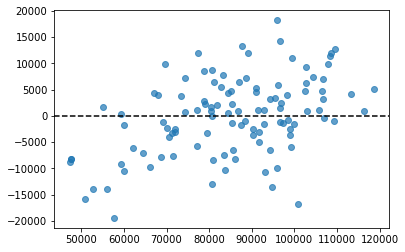

In [96]:
plt.scatter(Y,Y-y_estimado,alpha=0.7)
plt.axhline(0,c='k',linestyle='--')

### Método 2

In [92]:
model = LinearRegression()
fit = model.fit(X,Y)
fit.intercept_ , fit.coef_

(4968.009939448253, array([ 1973.19178023, 20235.51267934]))

# Logistic regresion

In [101]:
# Creo las variables categorícas 
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [107]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [108]:
X_l = df.drop('salario',axis=1)
y_l = np.where(df.salario > 96000, 1 ,0)

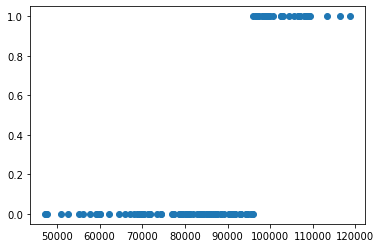

In [112]:
plt.scatter(df.salario,y_l)

In [118]:
# Aplico la regresión logistica
reg_log = linear_model.LogisticRegression().fit(X=X_l,y=y_l)

In [137]:
# Veo las probabilidades, en cada variable (0,1)
y_prob_l = reg_log.predict_proba(X_l)
y_prob_l[:10]

array([[0.43953818, 0.56046182],
       [0.97814889, 0.02185111],
       [0.6592862 , 0.3407138 ],
       [0.98215911, 0.01784089],
       [0.67084874, 0.32915126],
       [0.203018  , 0.796982  ],
       [0.92247826, 0.07752174],
       [0.42015979, 0.57984021],
       [0.80366258, 0.19633742],
       [0.97763117, 0.02236883]])

Si le pido solo la predicción , elige el valor que colocar, según el que tenga más probabilidad de los dos 

In [128]:
y_estimado_l = reg_log.predict(X_l)
y_estimado_l

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Para saber cúal es la eficiencia de mi regresión logistica:

In [130]:
eficiencia = accuracy_score(y_l,reg_log.predict(X_l))
eficiencia

0.9090909090909091

# Árboles de regresión y de clasificación

In [204]:
df_m = pd.read_csv('data/rating-peliculas.csv')
df_m.columns

Index(['pelicula', 'genero', 'ratings-rotten', 'ratings-audiencia',
       'costo-millones-usd', 'ano-estreno'],
      dtype='object')

In [205]:
df_m.describe()

,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [206]:
y_m   = df_m.genero
X_m = df_m.drop(['pelicula','genero'],axis=1)

In [207]:
X_m_train , X_m_test , y_m_train , y_m_test = train_test_split(X_m, y_m, test_size=0.2,random_state=1)

In [208]:
# Como vamos a estimar un variable categorica tenemos que usar un DecisionTreeClassifier, pero también existe para su version de regresión o para aproximar variables númericas 
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X_m_train,y_m_train)
y_m_predic = clf.predict(X_m_test)
y_m_predic

array(['Comedy', 'Drama', 'Action', 'Comedy', 'Comedy', 'Action',
       'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Comedy',
       'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy',
       'Action', 'Drama', 'Action', 'Comedy', 'Comedy', 'Drama', 'Action',
       'Comedy', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Action',
       'Comedy', 'Comedy', 'Action', 'Drama', 'Drama', 'Comedy', 'Action',
       'Comedy', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy',
       'Comedy', 'Drama', 'Action', 'Action', 'Drama', 'Comedy', 'Comedy',
       'Comedy', 'Action', 'Comedy', 'Comedy', 'Comedy', 'Comedy',
       'Drama', 'Drama', 'Drama', 'Comedy', 'Comedy', 'Action', 'Comedy',
       'Action', 'Action', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama',
       'Drama', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Action', 'Action',
       'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Drama', 'Action', 'Drama', 'Comedy', 'Drama', 'Comedy',
       

### Visualización

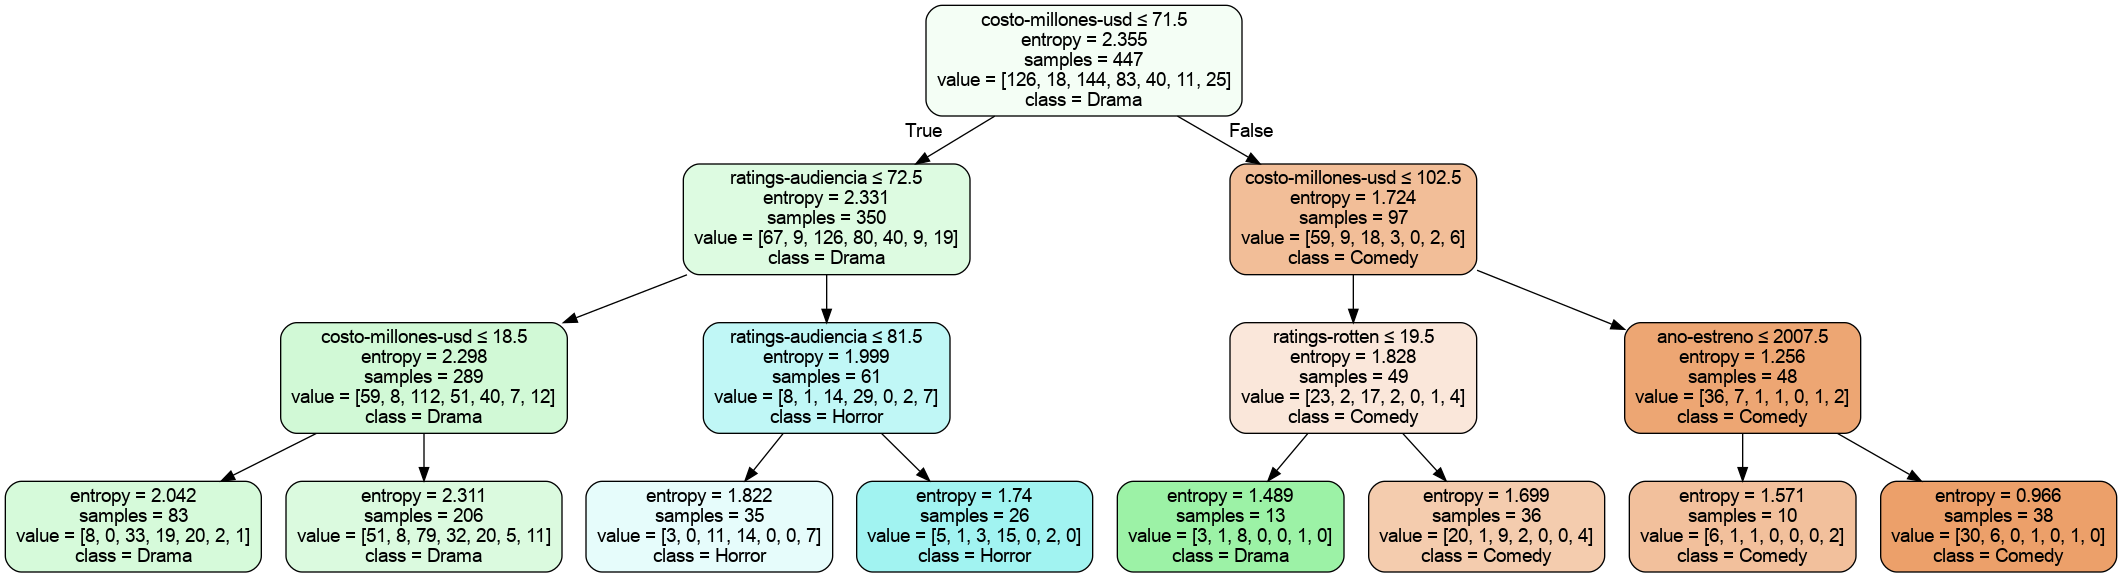

In [218]:
dot_data = StringIO()
#$Diselo de la función de visualización
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True ,special_characters = True, 
                feature_names = X_m.columns, class_names = y_m.value_counts().index
               )

# Definir el gráfico
graph = pydotplus.graph_from_dot_data( dot_data.getvalue() )

#Guardar la imagen generada
graph.write_png('movies.png')

# Cargar la imagen
Image(graph.create_png())


In [219]:
accuracy_score(y_m_test,y_m_predic)

0.375